In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [108]:
data = pd.read_excel('datos2.ods', sheet_name='fiscal')
datam = pd.read_excel('datos2.ods', sheet_name='monetary')

datam['mes'] = pd.to_datetime(datam['mes'])

In [109]:
datam.columns

Index(['mes', 'base_monetaria', 'm1', 'inflacion', 'oficial_xr',
       'intervention_xr', 'free_xr', 'ln_oficial_xr', 'ln_intervention_xr',
       'ln_free_xr'],
      dtype='object')

In [46]:
data.columns

Index(['year', 'pib_real_per_capita', 'tendencia_crecimiento2',
       'pib_real_per_capita_ln', 'tendencia_crecimiento2_ln', 'Wti_2010',
       'ingresos_gdp', 'gasto_gdp', 'deficit_gdp', 'deuda_externa_pib',
       'deuda_domestica_pib', 'cambio_deuda', 'senoreaje', 'nominal gdp',
       'inflation rate', 'total deficit', 'primary defict', 'total debt',
       'external debt', 'domestic debt', 'total interest payments',
       'interest on external debt', 'interest on domestic debt',
       'exchange rate', 'monetary base', 'real exchange rate', 'ingresos',
       'gastos'],
      dtype='object')

## PIB

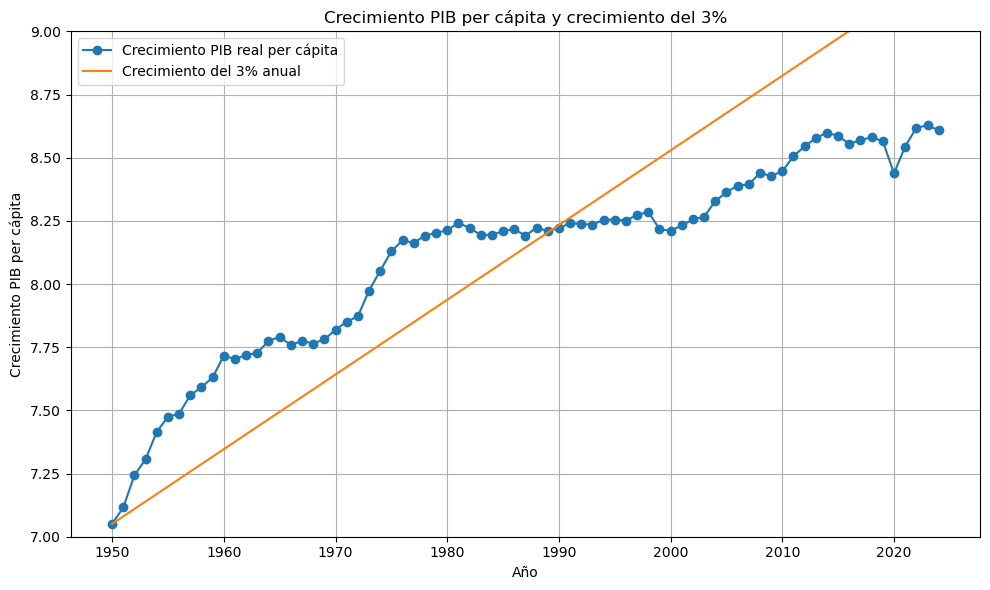

In [10]:
# Convierte año a numérico
data['year'] = pd.to_numeric(data['year'], errors='coerce')

# Sort by year (optional but good practice)
df = data.sort_values('year')

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['pib_real_per_capita_ln'], marker='o', linestyle='-', label='Crecimiento PIB real per cápita')
plt.plot(df['year'], df['tendencia_crecimiento2_ln'], marker='', linestyle='-', label=r'Crecimiento del 3% anual')

plt.ylim(7, 9)

plt.title('Crecimiento PIB per cápita y crecimiento del 3%')
plt.xlabel('Año')
plt.ylabel('Crecimiento PIB per cápita')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

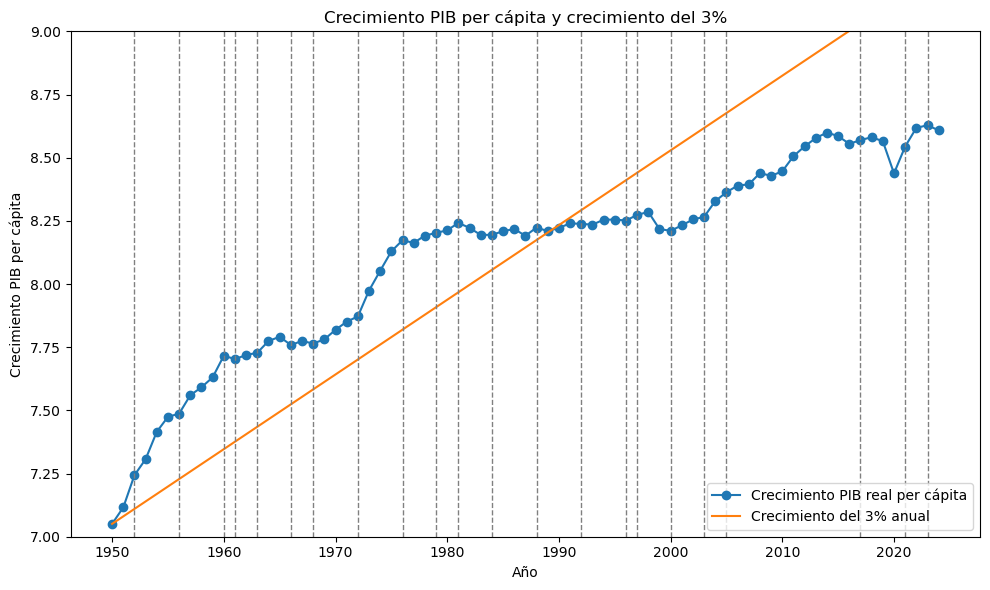

In [11]:
# Convierte año a numérico
data['year'] = pd.to_numeric(data['year'], errors='coerce')

# Sort by year
df = data.sort_values('year')

# Lista de años para líneas verticales
event_years = [1952, 1956, 1960, 1961, 1963, 1966, 1968, 1972, 1976, 1979,
               1981, 1984, 1988, 1992, 1996, 1997, 2000, 2003, 2005, 2017, 2021, 2023]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['pib_real_per_capita_ln'], marker='o', linestyle='-', label='Crecimiento PIB real per cápita')
plt.plot(df['year'], df['tendencia_crecimiento2_ln'], marker='', linestyle='-', label=r'Crecimiento del 3% anual')

# Agrega líneas verticales
for year in event_years:
    plt.axvline(x=year, color='gray', linestyle='--', linewidth=1, alpha=1)

plt.ylim(7, 9)

# Etiquetas y leyenda
plt.title('Crecimiento PIB per cápita y crecimiento del 3%')
plt.xlabel('Año')
plt.ylabel('Crecimiento PIB per cápita')
plt.grid(False)
plt.legend()
plt.tight_layout()
plt.show()

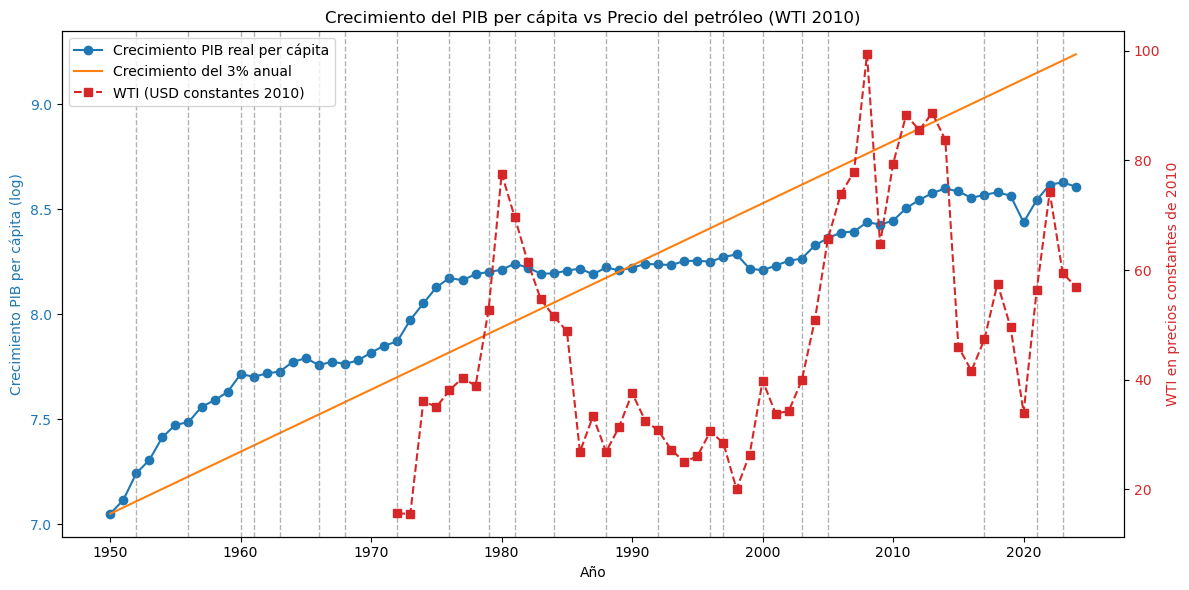

In [ ]:
# Convert year to numeric
data['year'] = pd.to_numeric(data['year'], errors='coerce')
df = data.sort_values('year')

# Years with vertical lines
event_years = [1952, 1956, 1960, 1961, 1963, 1966, 1968, 1972, 1976, 1979,
               1981, 1984, 1988, 1992, 1996, 1997, 2000, 2003, 2005, 2017, 2021, 2023]

# Main plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# First axis: GDP
ax1.plot(df['year'], df['pib_real_per_capita_ln'], marker='o', linestyle='-', color='tab:blue', label='Crecimiento PIB real per cápita')
ax1.plot(df['year'], df['tendencia_crecimiento2_ln'], linestyle='-', color='tab:orange', label='Crecimiento del 3% anual')
ax1.set_xlabel('Año')
ax1.set_ylabel('Crecimiento PIB per cápita (log)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Vertical lines
for year in event_years:
    ax1.axvline(x=year, color='gray', linestyle='--', linewidth=1, alpha=0.6)

# Second axis: Oil price
ax2 = ax1.twinx()
ax2.plot(df['year'], df['Wti_2010'], marker='s', linestyle='--', color='tab:red', label='WTI (USD constantes 2010)')
ax2.set_ylabel('WTI en precios constantes de 2010', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

# Title and grid
plt.title('Crecimiento del PIB per cápita vs Precio del petróleo (WTI 2010)')
plt.grid(False)
plt.tight_layout()
plt.show()

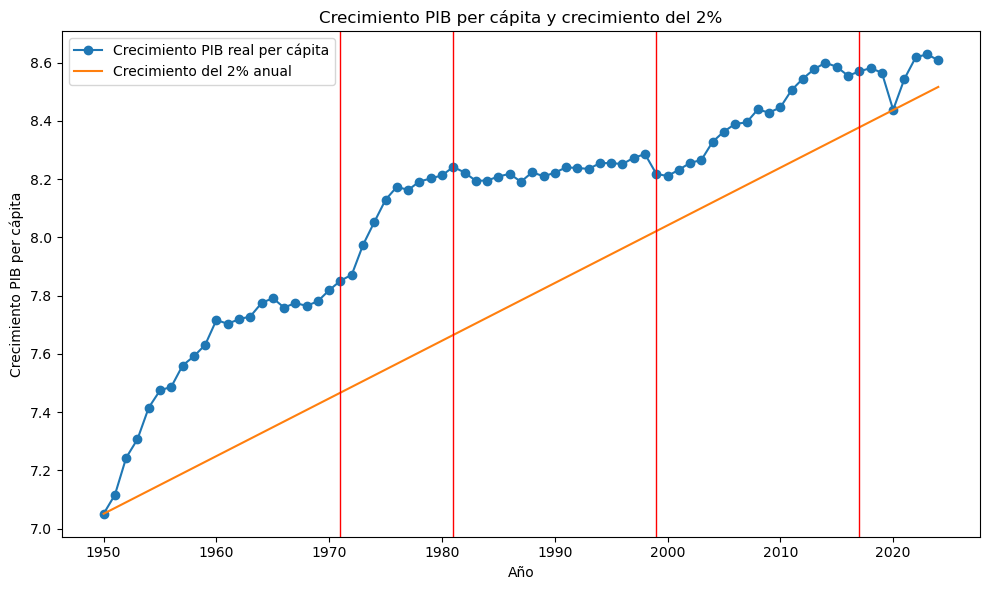

In [29]:
# Convierte año a numérico
data['year'] = pd.to_numeric(data['year'], errors='coerce')

# Sort by year
df = data.sort_values('year')

# Lista de años para líneas verticales
event_years = [1971, 1981, 1999, 2017]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['pib_real_per_capita_ln'], marker='o', linestyle='-', label='Crecimiento PIB real per cápita')
plt.plot(df['year'], df['tendencia_crecimiento2_ln'], marker='', linestyle='-', label=r'Crecimiento del 2% anual')

# Agrega líneas verticales
for year in event_years:
    plt.axvline(x=year, color='red', linestyle='-', linewidth=1, alpha=1)

# Etiquetas y leyenda
plt.title('Crecimiento PIB per cápita y crecimiento del 2%')
plt.xlabel('Año')
plt.ylabel('Crecimiento PIB per cápita')
plt.grid(False)
plt.legend()
plt.tight_layout()
plt.show()

## Boom bananero

In [61]:
df = data.loc[data['year'] <= 1971]
dfm = datam.loc[datam['mes'].dt.year <= 1971]

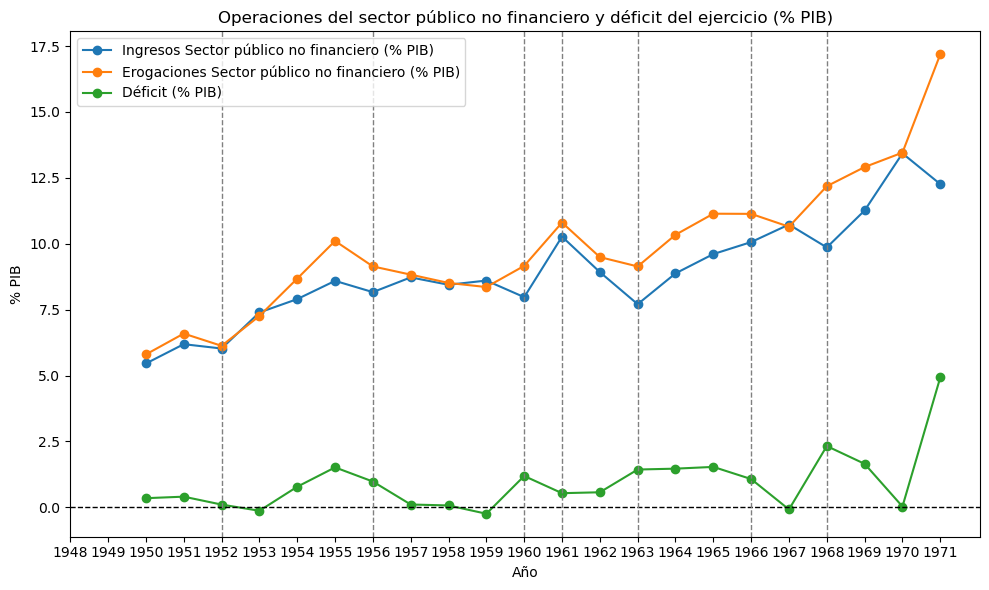

In [43]:
# Sort by year
df = df.sort_values('year')

# Lista de años para líneas verticales
event_years = [1952, 1956, 1960, 1961, 1963, 1966, 1968]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['ingresos_gdp'], marker='o', linestyle='-', label='Ingresos Sector público no financiero (% PIB)')
plt.plot(df['year'], df['gasto_gdp'], marker='o', linestyle='-', label='Erogaciones Sector público no financiero (% PIB)')
plt.plot(df['year'], df['deficit_gdp'], marker='o', linestyle='-', label='Déficit (% PIB)')

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

# Agrega líneas verticales
for year in event_years:
    plt.axvline(x=year, color='gray', linestyle='--', linewidth=1, alpha=1)
    
# Etiquetas y leyenda
plt.title('Operaciones del sector público no financiero y déficit del ejercicio (% PIB)')
plt.xlabel('Año')
plt.ylabel('% PIB')
plt.grid(False)
plt.legend()
plt.grid(False)
plt.xticks(ticks=range(df['year'].min(), df['year'].max() + 1, 1))
plt.tight_layout()
plt.show()

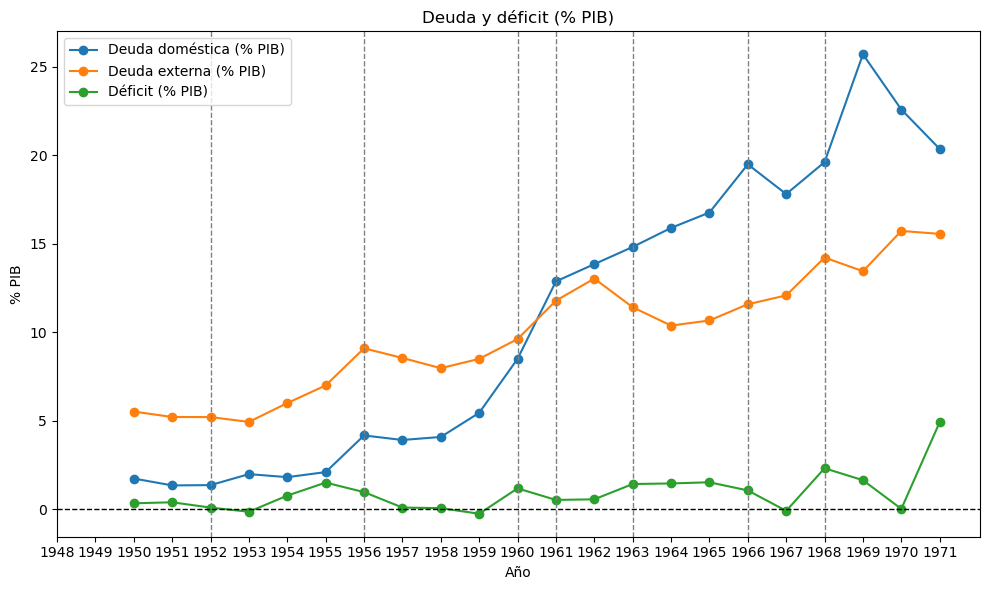

In [44]:
# Sort by year
df = df.sort_values('year')

# Lista de años para líneas verticales
event_years = [1952, 1956, 1960, 1961, 1963, 1966, 1968]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['deuda_domestica_pib'], marker='o', linestyle='-', label='Deuda doméstica (% PIB)')
plt.plot(df['year'], df['deuda_externa_pib'], marker='o', linestyle='-', label='Deuda externa (% PIB)')
plt.plot(df['year'], df['deficit_gdp'], marker='o', linestyle='-', label='Déficit (% PIB)')

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

# Agrega líneas verticales
for year in event_years:
    plt.axvline(x=year, color='gray', linestyle='--', linewidth=1, alpha=1)

# Etiquetas y leyenda
plt.title('Deuda y déficit (% PIB)')
plt.xlabel('Año')
plt.ylabel('% PIB')
plt.grid(False)
plt.legend()
plt.xticks(ticks=range(df['year'].min(), df['year'].max() + 1, 1))
plt.tight_layout()
plt.show()

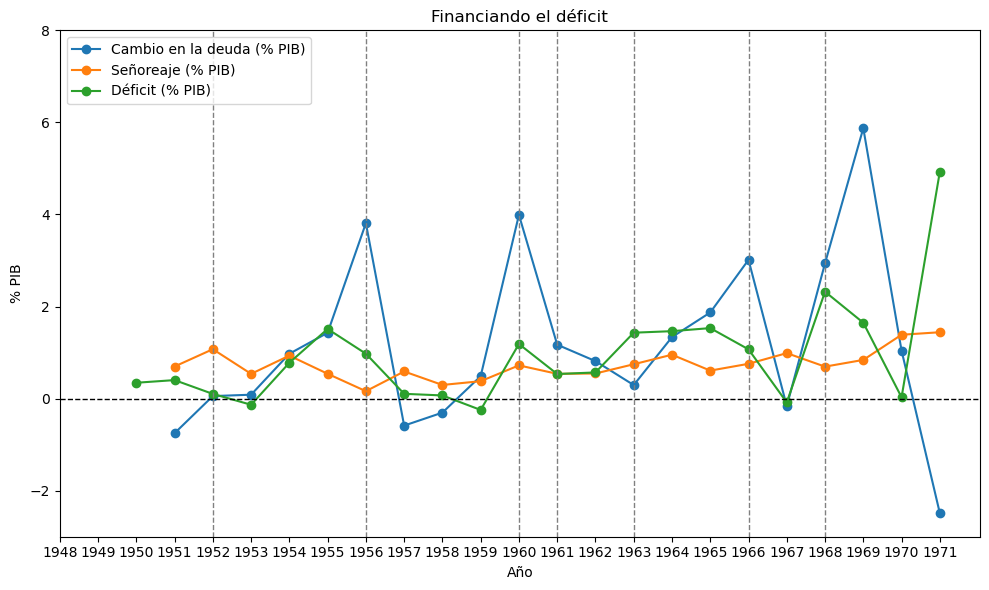

In [53]:
# Sort by year
df = df.sort_values('year')

# Lista de años para líneas verticales
event_years = [1952, 1956, 1960, 1961, 1963, 1966, 1968]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['cambio_deuda'], marker='o', linestyle='-', label='Cambio en la deuda (% PIB)')
plt.plot(df['year'], df['senoreaje'], marker='o', linestyle='-', label='Señoreaje (% PIB)')
plt.plot(df['year'], df['deficit_gdp'], marker='o', linestyle='-', label='Déficit (% PIB)')

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

# Agrega líneas verticales
for year in event_years:
    plt.axvline(x=year, color='gray', linestyle='--', linewidth=1, alpha=1)

plt.ylim(-3,8)
# Etiquetas y leyenda
plt.title('Financiando el déficit')
plt.xlabel('Año')
plt.ylabel('% PIB')
plt.grid(False)
plt.legend()
plt.xticks(ticks=range(df['year'].min(), df['year'].max() + 1, 1))
plt.tight_layout()
plt.show()

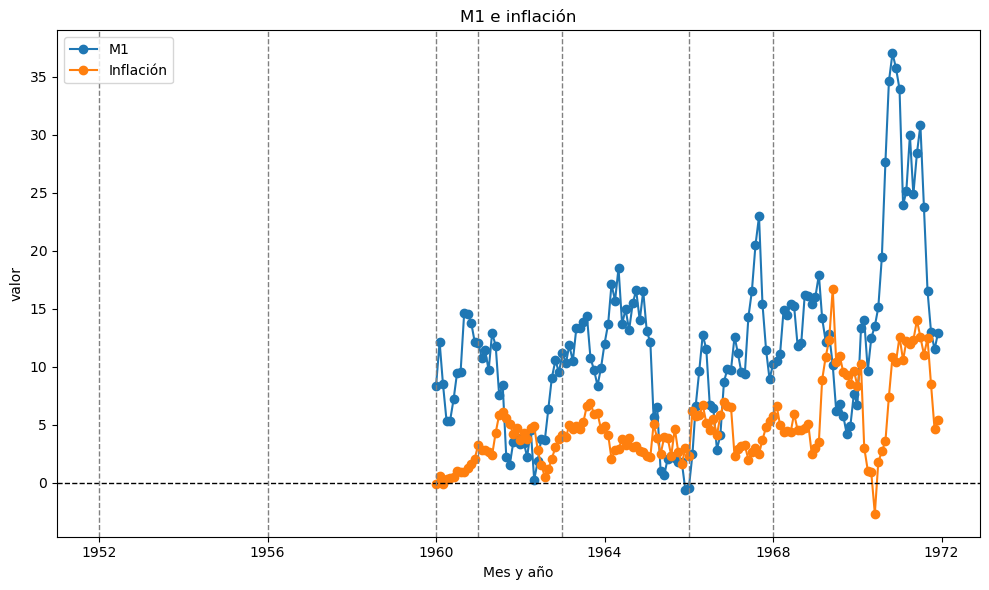

In [71]:
# Sort
dfm = dfm.sort_values('mes')

# Convertimos años a fechas reales (1 de enero)
event_years = [1952, 1956, 1960, 1961, 1963, 1966, 1968]
event_dates = [pd.to_datetime(f'{year}-01-01') for year in event_years]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(dfm['mes'], dfm['m1'], marker='o', linestyle='-', label='M1')
plt.plot(dfm['mes'], dfm['inflacion'], marker='o', linestyle='-', label='Inflación')

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

# Líneas verticales en fechas
for date in event_dates:
    plt.axvline(x=date, color='gray', linestyle='--', linewidth=1, alpha=1)

# Etiquetas y visual
plt.title('M1 e inflación')
plt.xlabel('Mes y año')
plt.ylabel('valor')
plt.grid(False)
plt.legend()
plt.tight_layout()
plt.show()

## Boom petrolero

In [72]:
df = data.loc[(data['year'] > 1971) & (data['year'] <= 1981)]
dfm = datam.loc[(datam['mes'].dt.year > 1971) & (datam['mes'].dt.year <= 1981)]

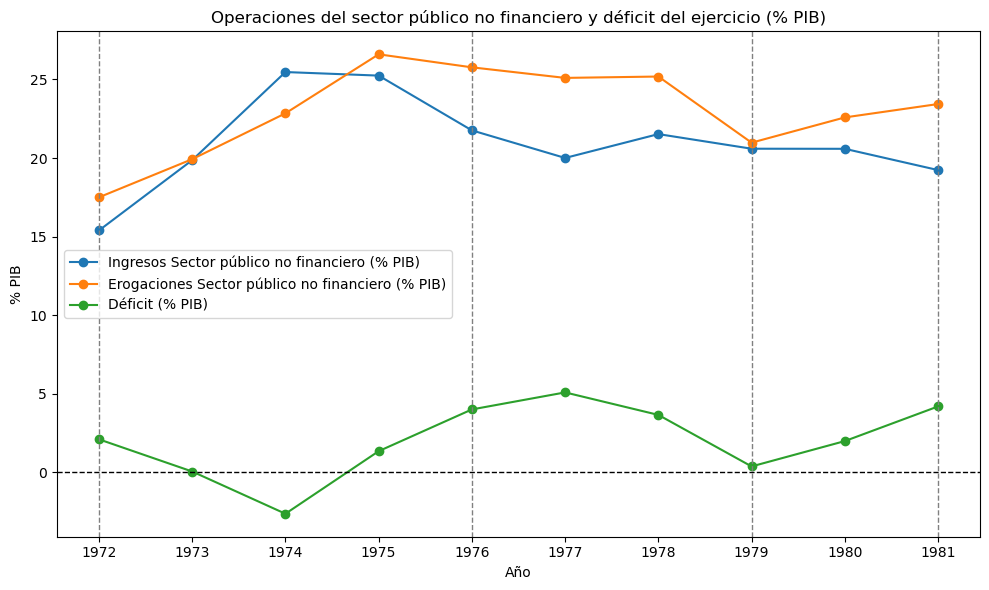

In [75]:
# Sort by year
df = df.sort_values('year')

# Lista de años para líneas verticales
event_years = [1972, 1976, 1979, 1981]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['ingresos_gdp'], marker='o', linestyle='-', label='Ingresos Sector público no financiero (% PIB)')
plt.plot(df['year'], df['gasto_gdp'], marker='o', linestyle='-', label='Erogaciones Sector público no financiero (% PIB)')
plt.plot(df['year'], df['deficit_gdp'], marker='o', linestyle='-', label='Déficit (% PIB)')

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

# Agrega líneas verticales
for year in event_years:
    plt.axvline(x=year, color='gray', linestyle='--', linewidth=1, alpha=1)
    
# Etiquetas y leyenda
plt.title('Operaciones del sector público no financiero y déficit del ejercicio (% PIB)')
plt.xlabel('Año')
plt.ylabel('% PIB')
plt.grid(False)
plt.legend()
plt.grid(False)
plt.xticks(ticks=range(df['year'].min(), df['year'].max() + 1, 1))
plt.tight_layout()
plt.show()

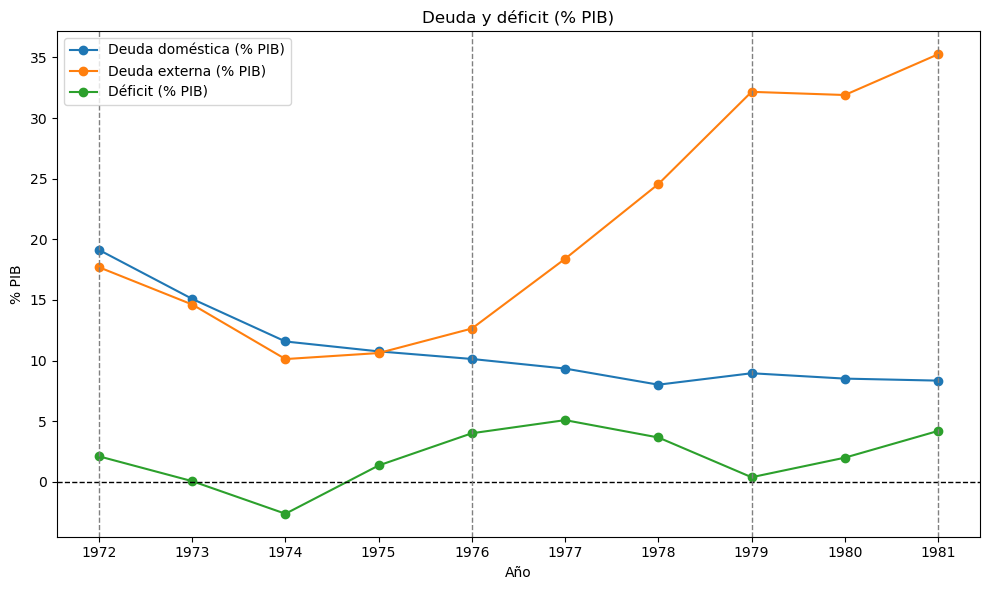

In [76]:
# Sort by year
df = df.sort_values('year')

# Lista de años para líneas verticales
event_years = [1972, 1976, 1979, 1981]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['deuda_domestica_pib'], marker='o', linestyle='-', label='Deuda doméstica (% PIB)')
plt.plot(df['year'], df['deuda_externa_pib'], marker='o', linestyle='-', label='Deuda externa (% PIB)')
plt.plot(df['year'], df['deficit_gdp'], marker='o', linestyle='-', label='Déficit (% PIB)')

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

# Agrega líneas verticales
for year in event_years:
    plt.axvline(x=year, color='gray', linestyle='--', linewidth=1, alpha=1)

# Etiquetas y leyenda
plt.title('Deuda y déficit (% PIB)')
plt.xlabel('Año')
plt.ylabel('% PIB')
plt.grid(False)
plt.legend()
plt.xticks(ticks=range(df['year'].min(), df['year'].max() + 1, 1))
plt.tight_layout()
plt.show()

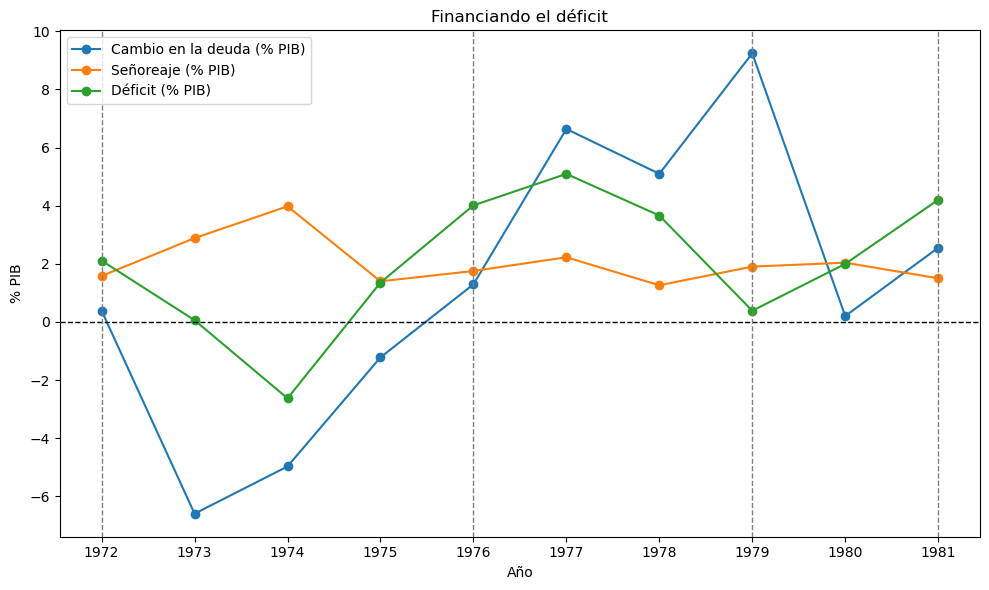

In [78]:
# Sort by year
df = df.sort_values('year')

# Lista de años para líneas verticales
event_years = [1972, 1976, 1979, 1981]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['cambio_deuda'], marker='o', linestyle='-', label='Cambio en la deuda (% PIB)')
plt.plot(df['year'], df['senoreaje'], marker='o', linestyle='-', label='Señoreaje (% PIB)')
plt.plot(df['year'], df['deficit_gdp'], marker='o', linestyle='-', label='Déficit (% PIB)')

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

# Agrega líneas verticales
for year in event_years:
    plt.axvline(x=year, color='gray', linestyle='--', linewidth=1, alpha=1)

# Etiquetas y leyenda
plt.title('Financiando el déficit')
plt.xlabel('Año')
plt.ylabel('% PIB')
plt.grid(False)
plt.legend()
plt.xticks(ticks=range(df['year'].min(), df['year'].max() + 1, 1))
plt.tight_layout()
plt.show()

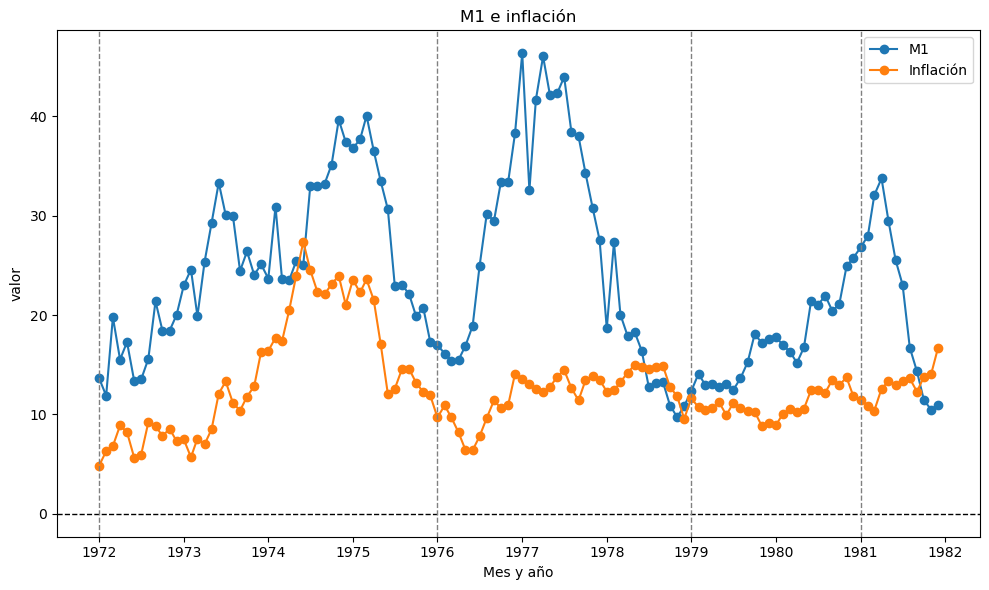

In [79]:
# Sort
dfm = dfm.sort_values('mes')

# Convertimos años a fechas reales (1 de enero)
event_years = [1972, 1976, 1979, 1981]
event_dates = [pd.to_datetime(f'{year}-01-01') for year in event_years]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(dfm['mes'], dfm['m1'], marker='o', linestyle='-', label='M1')
plt.plot(dfm['mes'], dfm['inflacion'], marker='o', linestyle='-', label='Inflación')

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

# Líneas verticales en fechas
for date in event_dates:
    plt.axvline(x=date, color='gray', linestyle='--', linewidth=1, alpha=1)

# Etiquetas y visual
plt.title('M1 e inflación')
plt.xlabel('Mes y año')
plt.ylabel('valor')
plt.grid(False)
plt.legend()
plt.tight_layout()
plt.show()

## Shocks y el ajuste

In [80]:
df = data.loc[(data['year'] > 1982) & (data['year'] <= 1999)]
dfm = datam.loc[(datam['mes'].dt.year > 1982) & (datam['mes'].dt.year <= 1999)]

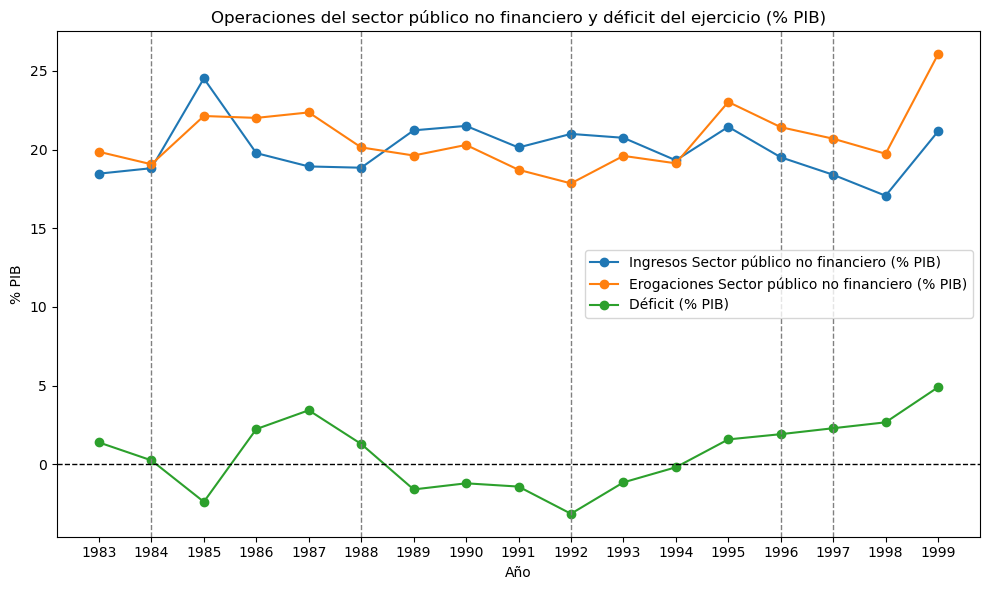

In [82]:
# Sort by year
df = df.sort_values('year')

# Lista de años para líneas verticales
event_years = [1984, 1988, 1992, 1996, 1997]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['ingresos_gdp'], marker='o', linestyle='-', label='Ingresos Sector público no financiero (% PIB)')
plt.plot(df['year'], df['gasto_gdp'], marker='o', linestyle='-', label='Erogaciones Sector público no financiero (% PIB)')
plt.plot(df['year'], df['deficit_gdp'], marker='o', linestyle='-', label='Déficit (% PIB)')

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

# Agrega líneas verticales
for year in event_years:
    plt.axvline(x=year, color='gray', linestyle='--', linewidth=1, alpha=1)
    
# Etiquetas y leyenda
plt.title('Operaciones del sector público no financiero y déficit del ejercicio (% PIB)')
plt.xlabel('Año')
plt.ylabel('% PIB')
plt.grid(False)
plt.legend()
plt.grid(False)
plt.xticks(ticks=range(df['year'].min(), df['year'].max() + 1, 1))
plt.tight_layout()
plt.show()

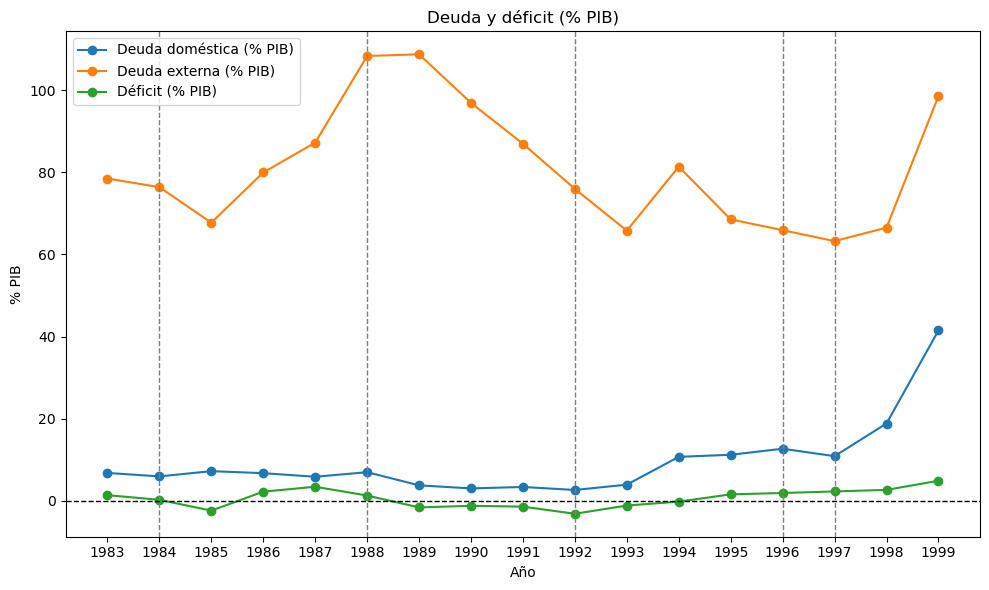

In [83]:
# Sort by year
df = df.sort_values('year')

# Lista de años para líneas verticales
event_years = [1984, 1988, 1992, 1996, 1997]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['deuda_domestica_pib'], marker='o', linestyle='-', label='Deuda doméstica (% PIB)')
plt.plot(df['year'], df['deuda_externa_pib'], marker='o', linestyle='-', label='Deuda externa (% PIB)')
plt.plot(df['year'], df['deficit_gdp'], marker='o', linestyle='-', label='Déficit (% PIB)')

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

# Agrega líneas verticales
for year in event_years:
    plt.axvline(x=year, color='gray', linestyle='--', linewidth=1, alpha=1)

# Etiquetas y leyenda
plt.title('Deuda y déficit (% PIB)')
plt.xlabel('Año')
plt.ylabel('% PIB')
plt.grid(False)
plt.legend()
plt.xticks(ticks=range(df['year'].min(), df['year'].max() + 1, 1))
plt.tight_layout()
plt.show()

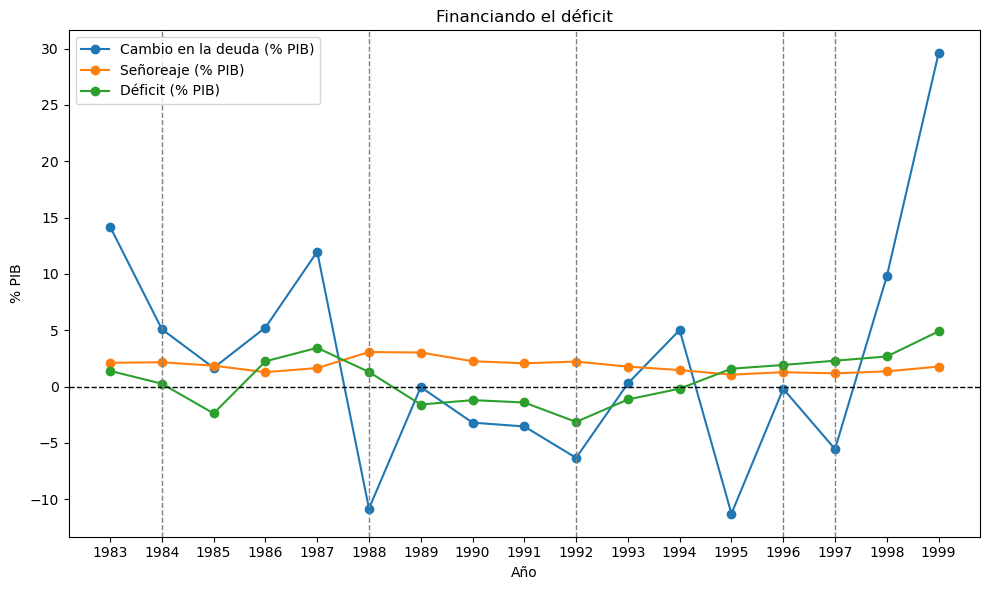

In [85]:
# Sort by year
df = df.sort_values('year')

# Lista de años para líneas verticales
event_years = [1984, 1988, 1992, 1996, 1997]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['cambio_deuda'], marker='o', linestyle='-', label='Cambio en la deuda (% PIB)')
plt.plot(df['year'], df['senoreaje'], marker='o', linestyle='-', label='Señoreaje (% PIB)')
plt.plot(df['year'], df['deficit_gdp'], marker='o', linestyle='-', label='Déficit (% PIB)')

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

# Agrega líneas verticales
for year in event_years:
    plt.axvline(x=year, color='gray', linestyle='--', linewidth=1, alpha=1)

# Etiquetas y leyenda
plt.title('Financiando el déficit')
plt.xlabel('Año')
plt.ylabel('% PIB')
plt.grid(False)
plt.legend()
plt.xticks(ticks=range(df['year'].min(), df['year'].max() + 1, 1))
plt.tight_layout()
plt.show()

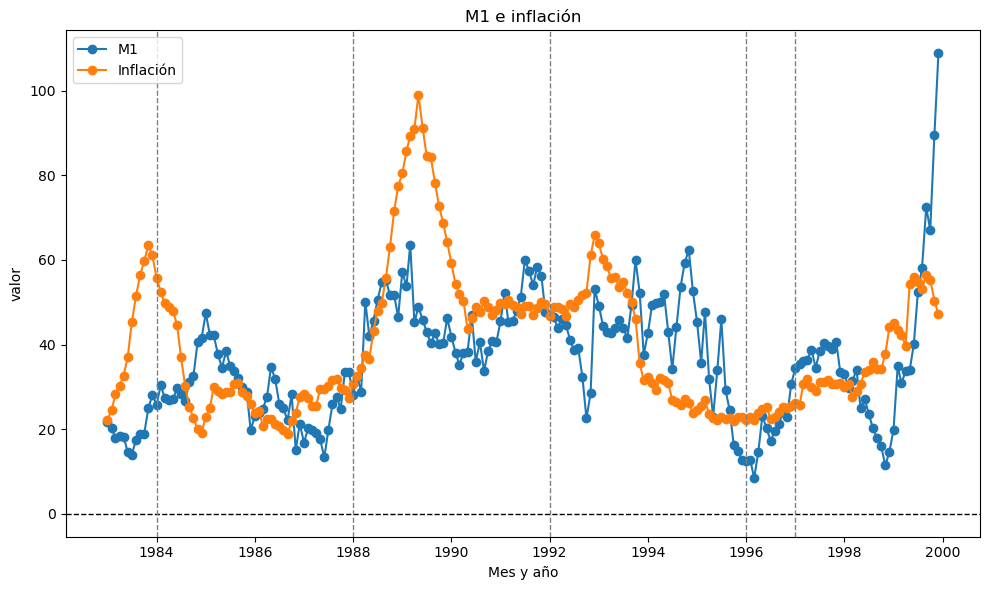

In [86]:
# Sort
dfm = dfm.sort_values('mes')

# Convertimos años a fechas reales (1 de enero)
event_years = [1984, 1988, 1992, 1996, 1997]
event_dates = [pd.to_datetime(f'{year}-01-01') for year in event_years]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(dfm['mes'], dfm['m1'], marker='o', linestyle='-', label='M1')
plt.plot(dfm['mes'], dfm['inflacion'], marker='o', linestyle='-', label='Inflación')

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

# Líneas verticales en fechas
for date in event_dates:
    plt.axvline(x=date, color='gray', linestyle='--', linewidth=1, alpha=1)

# Etiquetas y visual
plt.title('M1 e inflación')
plt.xlabel('Mes y año')
plt.ylabel('valor')
plt.grid(False)
plt.legend()
plt.tight_layout()
plt.show()

## Dolarización y commidities

In [93]:
df = data.loc[data['year'] > 2017]
dfm = datam.loc[datam['mes'].dt.year > 2017]

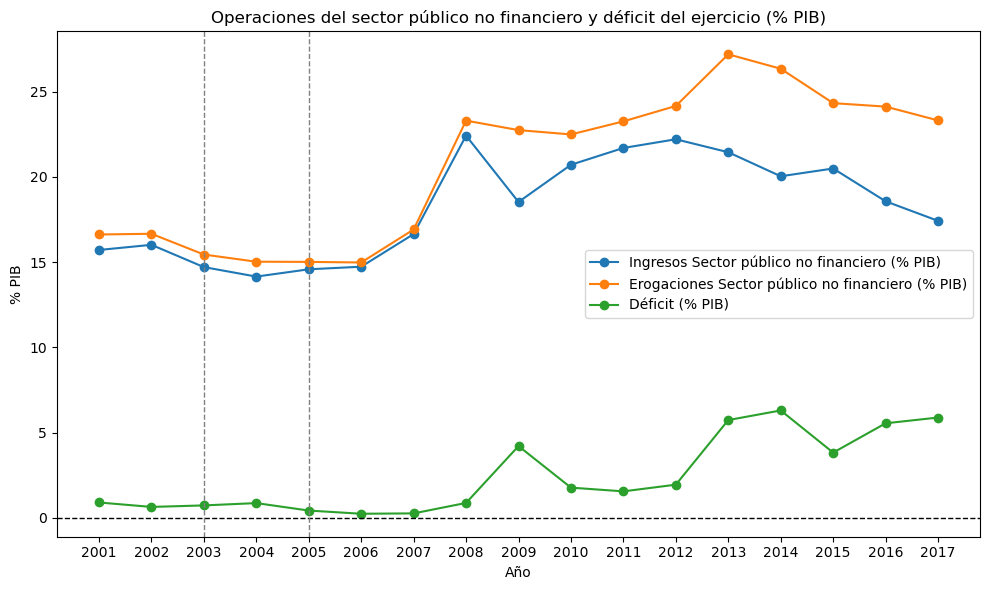

In [89]:
# Sort by year
df = df.sort_values('year')

# Lista de años para líneas verticales
event_years = [2003, 2005]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['ingresos_gdp'], marker='o', linestyle='-', label='Ingresos Sector público no financiero (% PIB)')
plt.plot(df['year'], df['gasto_gdp'], marker='o', linestyle='-', label='Erogaciones Sector público no financiero (% PIB)')
plt.plot(df['year'], df['deficit_gdp'], marker='o', linestyle='-', label='Déficit (% PIB)')

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

# Agrega líneas verticales
for year in event_years:
    plt.axvline(x=year, color='gray', linestyle='--', linewidth=1, alpha=1)
    
# Etiquetas y leyenda
plt.title('Operaciones del sector público no financiero y déficit del ejercicio (% PIB)')
plt.xlabel('Año')
plt.ylabel('% PIB')
plt.grid(False)
plt.legend()
plt.grid(False)
plt.xticks(ticks=range(df['year'].min(), df['year'].max() + 1, 1))
plt.tight_layout()
plt.show()

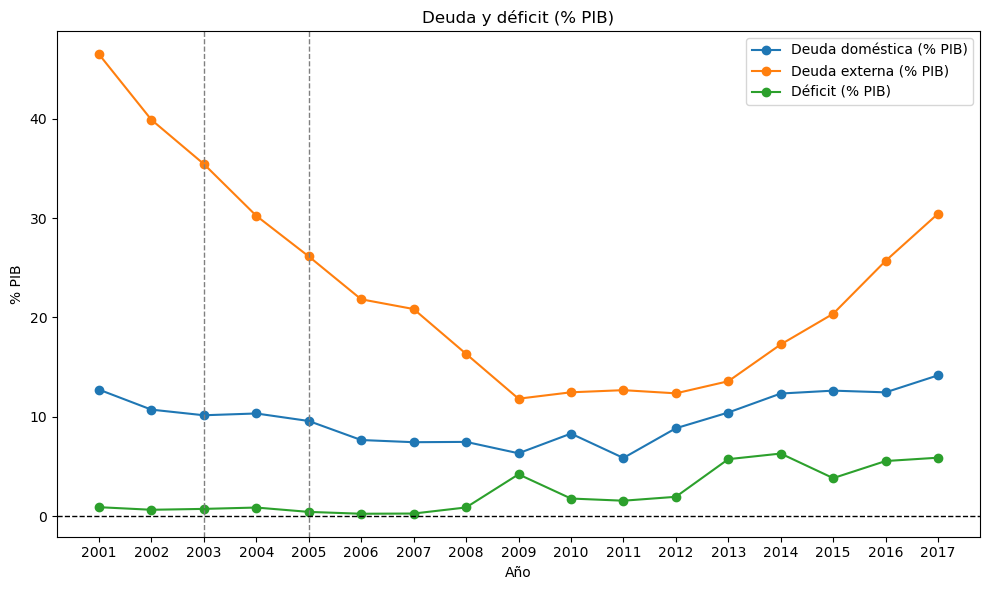

In [90]:
# Sort by year
df = df.sort_values('year')

# Lista de años para líneas verticales
event_years = [2003, 2005]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['deuda_domestica_pib'], marker='o', linestyle='-', label='Deuda doméstica (% PIB)')
plt.plot(df['year'], df['deuda_externa_pib'], marker='o', linestyle='-', label='Deuda externa (% PIB)')
plt.plot(df['year'], df['deficit_gdp'], marker='o', linestyle='-', label='Déficit (% PIB)')

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

# Agrega líneas verticales
for year in event_years:
    plt.axvline(x=year, color='gray', linestyle='--', linewidth=1, alpha=1)

# Etiquetas y leyenda
plt.title('Deuda y déficit (% PIB)')
plt.xlabel('Año')
plt.ylabel('% PIB')
plt.grid(False)
plt.legend()
plt.xticks(ticks=range(df['year'].min(), df['year'].max() + 1, 1))
plt.tight_layout()
plt.show()

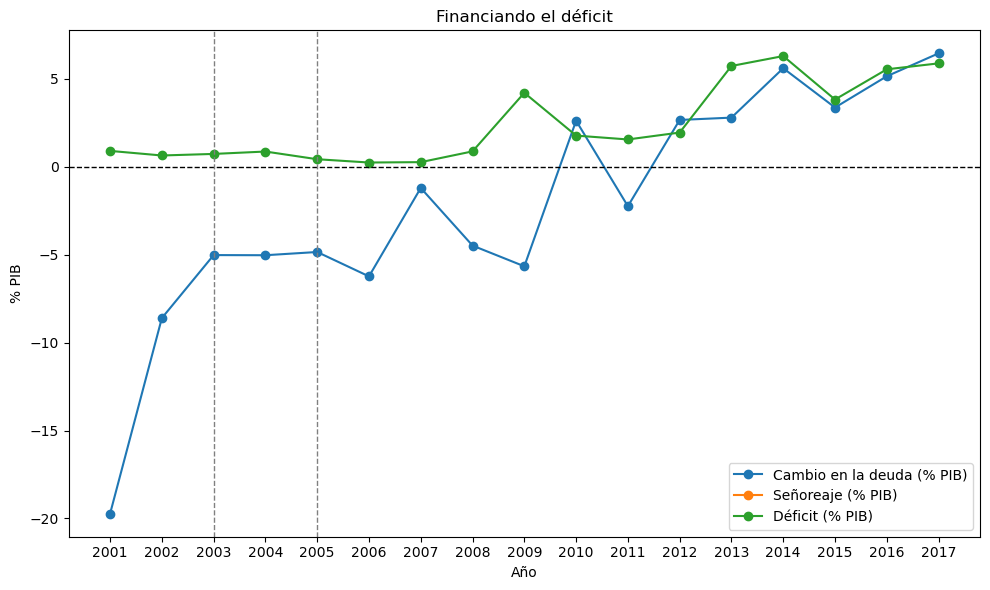

In [91]:
# Sort by year
df = df.sort_values('year')

# Lista de años para líneas verticales
event_years = [2003, 2005]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['cambio_deuda'], marker='o', linestyle='-', label='Cambio en la deuda (% PIB)')
plt.plot(df['year'], df['senoreaje'], marker='o', linestyle='-', label='Señoreaje (% PIB)')
plt.plot(df['year'], df['deficit_gdp'], marker='o', linestyle='-', label='Déficit (% PIB)')

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

# Agrega líneas verticales
for year in event_years:
    plt.axvline(x=year, color='gray', linestyle='--', linewidth=1, alpha=1)

# Etiquetas y leyenda
plt.title('Financiando el déficit')
plt.xlabel('Año')
plt.ylabel('% PIB')
plt.grid(False)
plt.legend()
plt.xticks(ticks=range(df['year'].min(), df['year'].max() + 1, 1))
plt.tight_layout()
plt.show()

## Nuevo ajuste

In [ ]:
df = data.loc[(data['year'] > 2000) & (data['year'] <= 2017)]
dfm = datam.loc[(datam['mes'].dt.year > 2000) & (datam['mes'].dt.year <= 2017)]

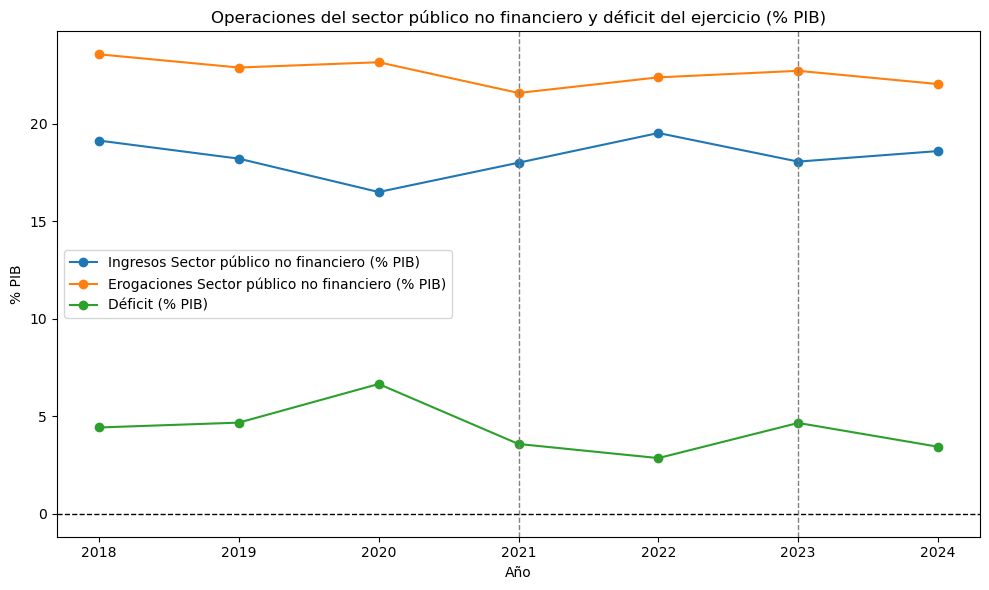

In [94]:
# Sort by year
df = df.sort_values('year')

# Lista de años para líneas verticales
event_years = [2021, 2023]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['ingresos_gdp'], marker='o', linestyle='-', label='Ingresos Sector público no financiero (% PIB)')
plt.plot(df['year'], df['gasto_gdp'], marker='o', linestyle='-', label='Erogaciones Sector público no financiero (% PIB)')
plt.plot(df['year'], df['deficit_gdp'], marker='o', linestyle='-', label='Déficit (% PIB)')

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

# Agrega líneas verticales
for year in event_years:
    plt.axvline(x=year, color='gray', linestyle='--', linewidth=1, alpha=1)
    
# Etiquetas y leyenda
plt.title('Operaciones del sector público no financiero y déficit del ejercicio (% PIB)')
plt.xlabel('Año')
plt.ylabel('% PIB')
plt.grid(False)
plt.legend()
plt.grid(False)
plt.xticks(ticks=range(df['year'].min(), df['year'].max() + 1, 1))
plt.tight_layout()
plt.show()

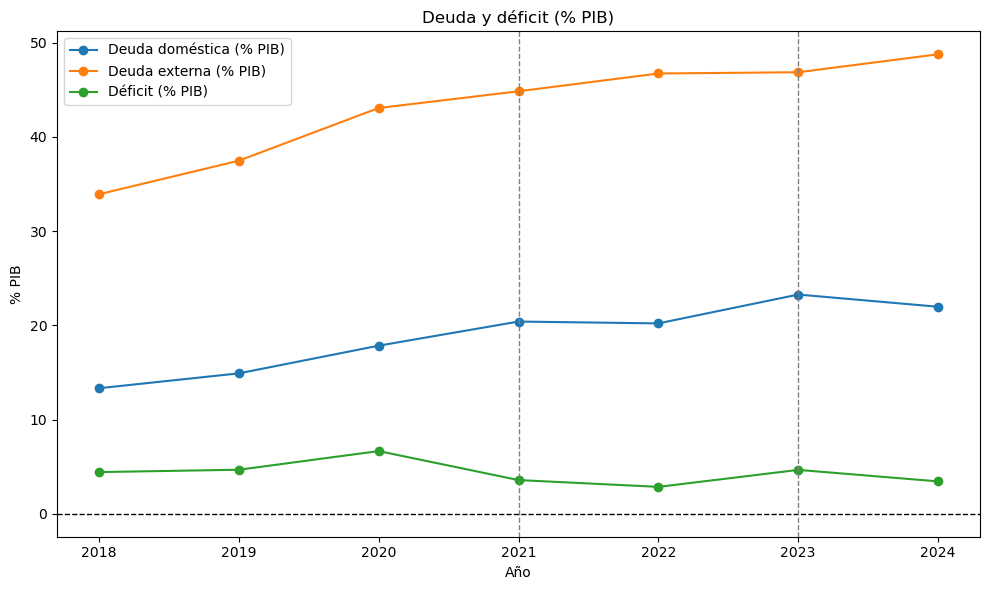

In [95]:
# Sort by year
df = df.sort_values('year')

# Lista de años para líneas verticales
event_years = [2021, 2023]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['deuda_domestica_pib'], marker='o', linestyle='-', label='Deuda doméstica (% PIB)')
plt.plot(df['year'], df['deuda_externa_pib'], marker='o', linestyle='-', label='Deuda externa (% PIB)')
plt.plot(df['year'], df['deficit_gdp'], marker='o', linestyle='-', label='Déficit (% PIB)')

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

# Agrega líneas verticales
for year in event_years:
    plt.axvline(x=year, color='gray', linestyle='--', linewidth=1, alpha=1)

# Etiquetas y leyenda
plt.title('Deuda y déficit (% PIB)')
plt.xlabel('Año')
plt.ylabel('% PIB')
plt.grid(False)
plt.legend()
plt.xticks(ticks=range(df['year'].min(), df['year'].max() + 1, 1))
plt.tight_layout()
plt.show()

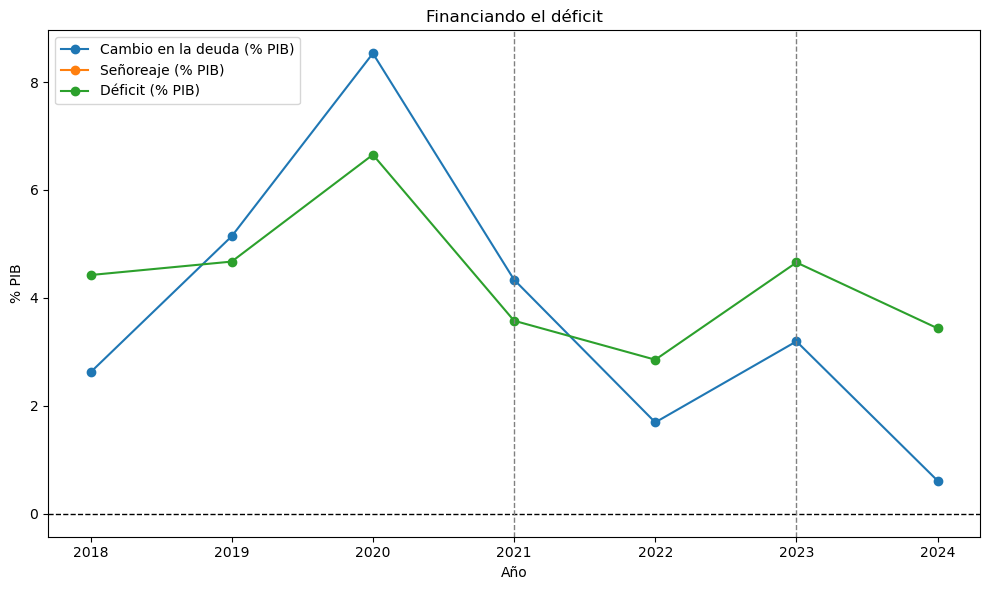

In [96]:
# Sort by year
df = df.sort_values('year')

# Lista de años para líneas verticales
event_years = [2021, 2023]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['cambio_deuda'], marker='o', linestyle='-', label='Cambio en la deuda (% PIB)')
plt.plot(df['year'], df['senoreaje'], marker='o', linestyle='-', label='Señoreaje (% PIB)')
plt.plot(df['year'], df['deficit_gdp'], marker='o', linestyle='-', label='Déficit (% PIB)')

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

# Agrega líneas verticales
for year in event_years:
    plt.axvline(x=year, color='gray', linestyle='--', linewidth=1, alpha=1)

# Etiquetas y leyenda
plt.title('Financiando el déficit')
plt.xlabel('Año')
plt.ylabel('% PIB')
plt.grid(False)
plt.legend()
plt.xticks(ticks=range(df['year'].min(), df['year'].max() + 1, 1))
plt.tight_layout()
plt.show()

## Todo

In [110]:
df = data
dfm = datam

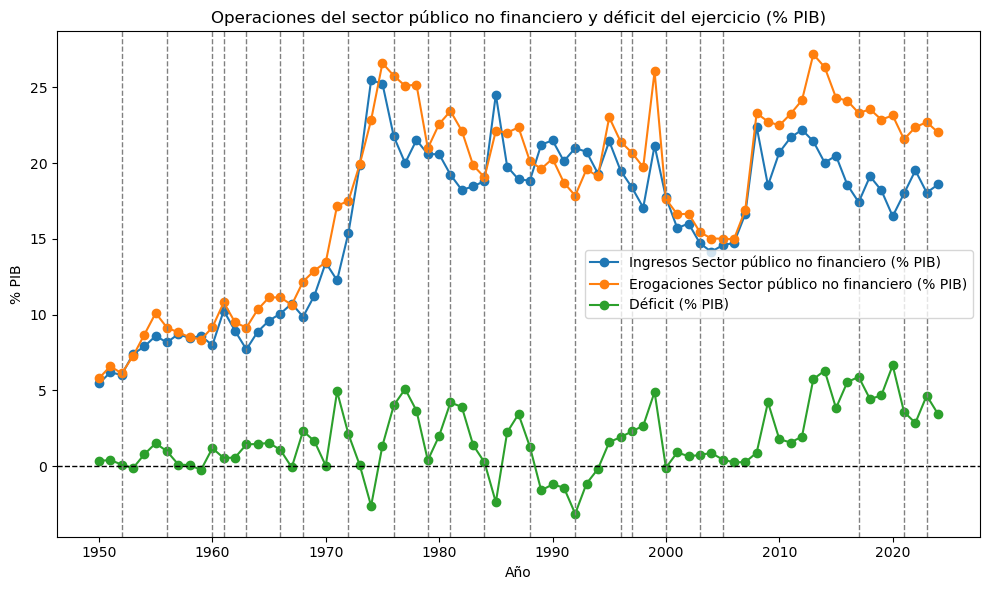

In [100]:
# Sort by year
df = df.sort_values('year')

# Lista de años para líneas verticales
event_years = [1952, 1956, 1960, 1961, 1963, 1966, 1968, 1972, 1976, 1979,
               1981, 1984, 1988, 1992, 1996, 1997, 2000, 2003, 2005, 2017, 2021, 2023]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['ingresos_gdp'], marker='o', linestyle='-', label='Ingresos Sector público no financiero (% PIB)')
plt.plot(df['year'], df['gasto_gdp'], marker='o', linestyle='-', label='Erogaciones Sector público no financiero (% PIB)')
plt.plot(df['year'], df['deficit_gdp'], marker='o', linestyle='-', label='Déficit (% PIB)')

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

# Agrega líneas verticales
for year in event_years:
    plt.axvline(x=year, color='gray', linestyle='--', linewidth=1, alpha=1)
    
# Etiquetas y leyenda
plt.title('Operaciones del sector público no financiero y déficit del ejercicio (% PIB)')
plt.xlabel('Año')
plt.ylabel('% PIB')
plt.grid(False)
plt.legend()
plt.grid(False)
#plt.xticks(ticks=range(df['year'].min(), df['year'].max() + 1, 1))
plt.tight_layout()
plt.show()

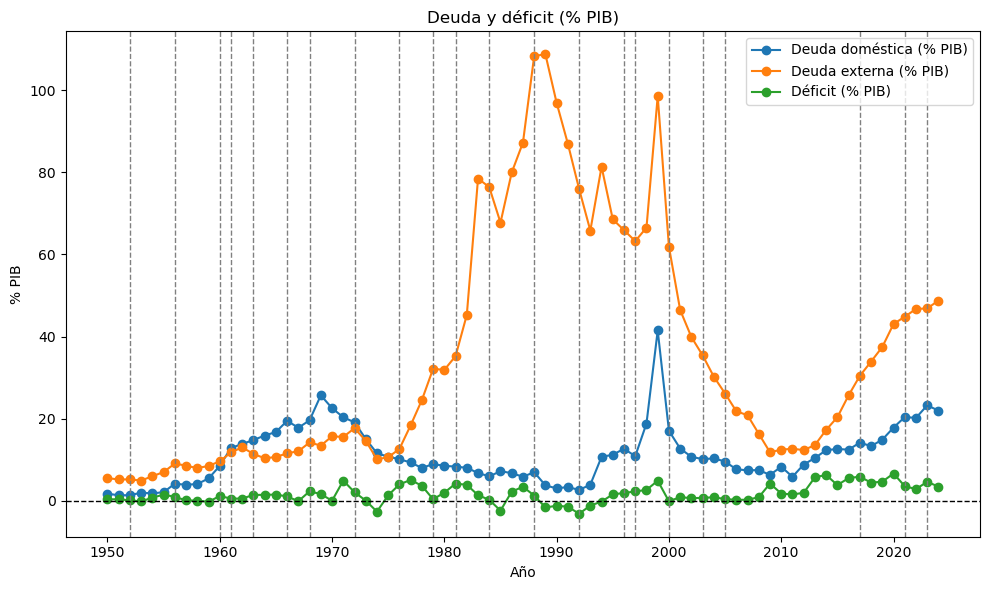

In [102]:
# Sort by year
df = df.sort_values('year')

# Lista de años para líneas verticales
event_years = [1952, 1956, 1960, 1961, 1963, 1966, 1968, 1972, 1976, 1979,
               1981, 1984, 1988, 1992, 1996, 1997, 2000, 2003, 2005, 2017, 2021, 2023]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['deuda_domestica_pib'], marker='o', linestyle='-', label='Deuda doméstica (% PIB)')
plt.plot(df['year'], df['deuda_externa_pib'], marker='o', linestyle='-', label='Deuda externa (% PIB)')
plt.plot(df['year'], df['deficit_gdp'], marker='o', linestyle='-', label='Déficit (% PIB)')

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

# Agrega líneas verticales
for year in event_years:
    plt.axvline(x=year, color='gray', linestyle='--', linewidth=1, alpha=1)

# Etiquetas y leyenda
plt.title('Deuda y déficit (% PIB)')
plt.xlabel('Año')
plt.ylabel('% PIB')
plt.grid(False)
plt.legend()
plt.tight_layout()
plt.show()

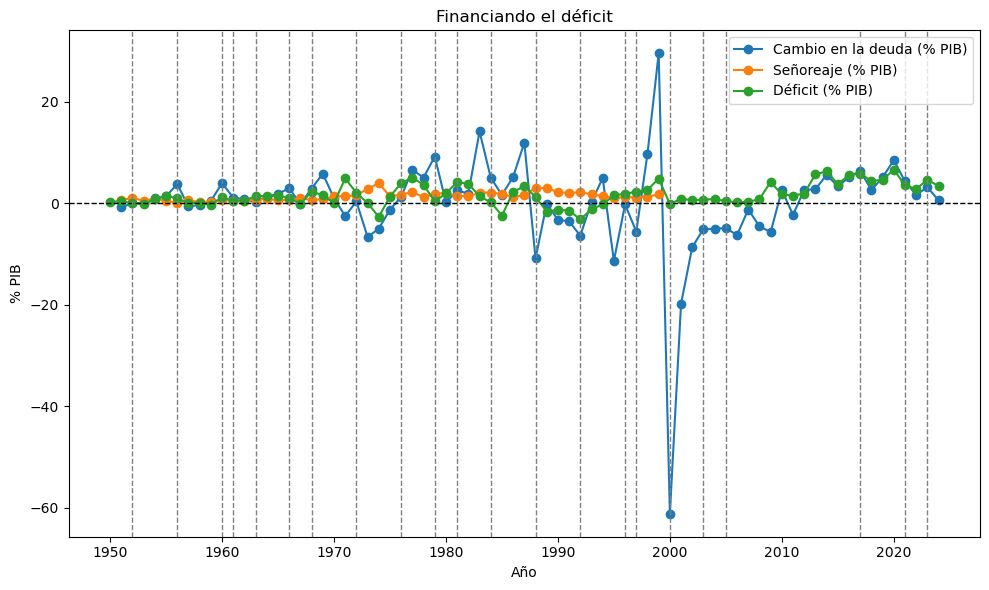

In [104]:
# Sort by year
df = df.sort_values('year')

# Lista de años para líneas verticales
event_years = [1952, 1956, 1960, 1961, 1963, 1966, 1968, 1972, 1976, 1979,
               1981, 1984, 1988, 1992, 1996, 1997, 2000, 2003, 2005, 2017, 2021, 2023]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['cambio_deuda'], marker='o', linestyle='-', label='Cambio en la deuda (% PIB)')
plt.plot(df['year'], df['senoreaje'], marker='o', linestyle='-', label='Señoreaje (% PIB)')
plt.plot(df['year'], df['deficit_gdp'], marker='o', linestyle='-', label='Déficit (% PIB)')

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

# Agrega líneas verticales
for year in event_years:
    plt.axvline(x=year, color='gray', linestyle='--', linewidth=1, alpha=1)

# Etiquetas y leyenda
plt.title('Financiando el déficit')
plt.xlabel('Año')
plt.ylabel('% PIB')
plt.grid(False)
plt.legend()
plt.tight_layout()
plt.show()

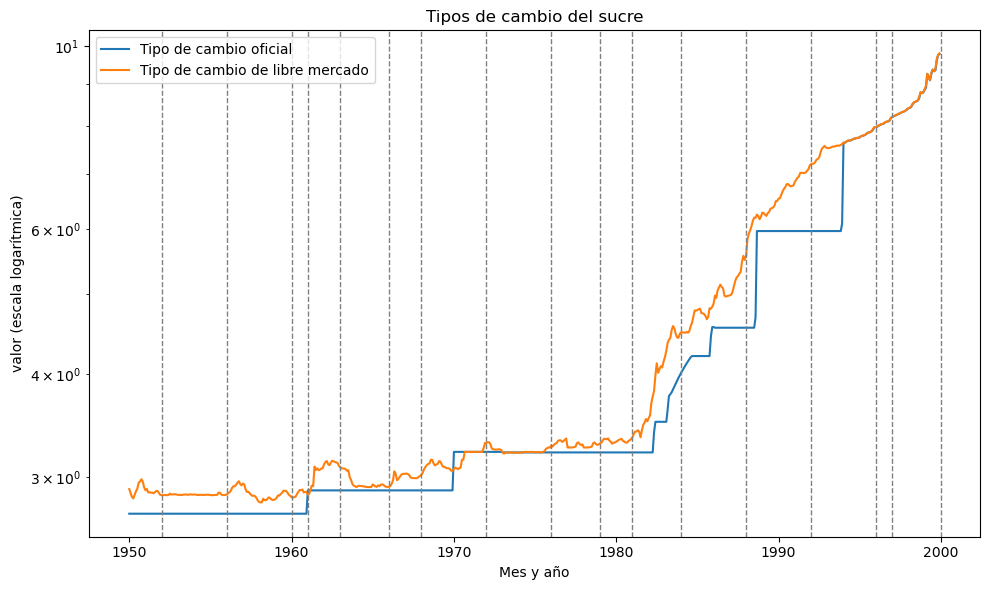

In [118]:
# Sort
dfm = dfm.sort_values('mes')

# Convertimos años a fechas reales (1 de enero)
event_years = [1952, 1956, 1960, 1961, 1963, 1966, 1968, 1972, 1976, 1979,
               1981, 1984, 1988, 1992, 1996, 1997, 2000]
event_dates = [pd.to_datetime(f'{year}-01-01') for year in event_years]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(dfm['mes'], dfm['ln_oficial_xr'], marker='', linestyle='-', label='Tipo de cambio oficial')
plt.plot(dfm['mes'], dfm['ln_free_xr'], marker='', linestyle='-', label='Tipo de cambio de libre mercado')

# Líneas verticales en fechas
for date in event_dates:
    plt.axvline(x=date, color='gray', linestyle='--', linewidth=1, alpha=1)

plt.yscale('log')

# Etiquetas y visual
plt.title('Tipos de cambio del sucre')
plt.xlabel('Mes y año')
plt.ylabel('valor (escala logarítmica)')
plt.grid(False)
plt.legend()
plt.tight_layout()
plt.show()